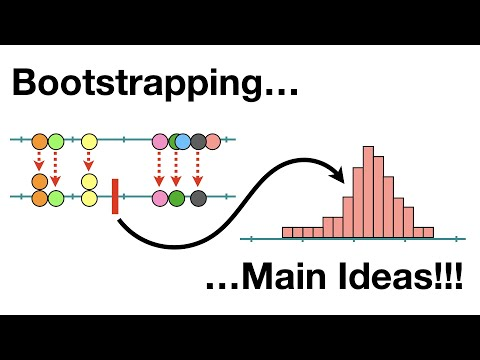

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


#1.  
The difference between SED and SD is that the Standard deviation calculates the the spread or variability of data points within a data set, whereas with Stadard error of the mean is usually calculated with multiple data sets resulting from bootstrapping, therefore you can take multiple means of multiple generated data sets, then calculate the standard error from those sets.
The key differences are that the standard deviation tells you how spread out the data is, whereas the standard error of the mean tells you how accurate your estimated data is amongst multiple different samples of bootstrapped data.

#2.
If the sample size is relatively large, we can assume normality amongst the distribution of data. Using a 95% confidence interval, we can take a critical value or whats called the z score to be around 1.96, meaning that 95% of the value lies within 1.96 standard errors from the mean, then using the bootstrapped mean and the SEM to calculate confidence interval, with the formula being the bootstrapped mean plus or minus the z-score multiplied by the SEM to get the upper bound and the lower bound. This gives you a general idea of where 95% of the values lie.

#3. 
Using the np.quantile() function, we can take the 97.5% and 2.5% percentiles of the data and get the exact 95% of the data. Instead of calculating using approximately 2 times the standard error, we instead get the exact range of the percentiles using np.quantile() on the bootstrapped means of the data. 

#4. 

Mean income: $30,365.10
Median income: $21,980.79
Standard deviation: $29,031.95


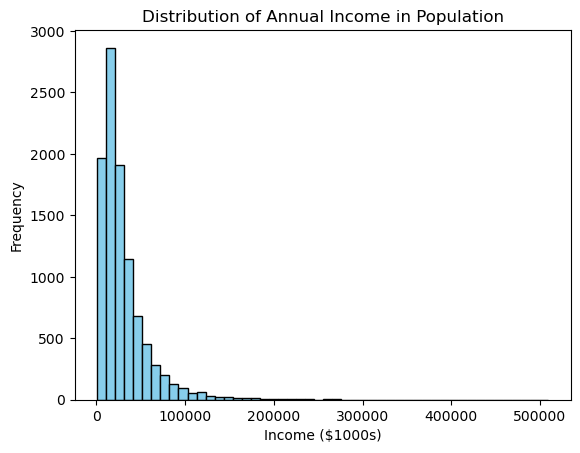

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Number of individuals in the population
population_size = 10000

# Parameters for log-normal distribution (mean and standard deviation of the underlying normal distribution)
mu = 10    # Controls the central tendency of the data
sigma = 0.8  # Controls the spread of the data

# Generate population data (e.g., annual income in $1000s)
population_data = np.random.lognormal(mean=mu, sigma=sigma, size=population_size)

# Display some summary statistics. 
# This is where you can change the different population parameters to get the value you want to analyze
# mean, median, and std are shown here.
mean_income = np.mean(population_data)
median_income = np.median(population_data)
std_dev_income = np.std(population_data)

print(f"Mean income: ${mean_income:,.2f}")
print(f"Median income: ${median_income:,.2f}")
print(f"Standard deviation: ${std_dev_income:,.2f}")

# Plot the population data distribution (optional)
plt.hist(population_data, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Annual Income in Population")
plt.xlabel("Income ($1000s)")
plt.ylabel("Frequency")
plt.show()


In [4]:
import numpy as np
#Generate a random seed for producing a random dataset
np.random.seed(42)
#create a synthetic dataset for analysis
population_size = 10000 #setting the population size
mu = 10 #Log of the normal distribution mean 
sigma = 0.8 #Log normal standard deviation
population_data = np.random.lognormal(mean=mu, sigma=sigma, size=population_size) #generating a synthetic dataset 

n_bootstraps = 1000 #number of bootstrapped data
bootstrapped_means = [] #creating an array to store the calculated data

for _ in range(n_bootstraps):  #for loop to calculate all the means
    #create a bootstrapped sample from the original data, with replacements
    bootstrap_sample = np.random.choice(population_data, size=len(population_data), replace=True) 
    
    #calculate the mean of the sample 
    boot_mean = np.mean(bootstrap_sample)
    
    #add the mean to the array of means created earlier
    bootstrapped_means.append(boot_mean)

#convert the bootstrapped list into an NumPy array
bootstrapped_means = np.array(bootstrapped_means)

#set upper and lower bounds using the quantile function
lower_bound = np.quantile(bootstrapped_means, 0.025)
upper_bound = np.quantile(bootstrapped_means, 0.975)

#print out the data.
print(f"95% Bootstrapped Confidence Interval for the Mean: [{lower_bound:,.2f}, {upper_bound:,.2f}]")
original_mean = np.mean(population_data)
print(f"Original Mean: {original_mean:,.2f}")


95% Bootstrapped Confidence Interval for the Mean: [29,840.27, 30,954.93]
Original Mean: 30,365.10


Link to the conversation: https://chatgpt.com/share/66f9b240-6b64-8010-b5e7-69011443cea4
Certainly! Here's a summary of our conversation:

Bootstrapped Standard Error vs. Original Standard Deviation:

We discussed how the standard error of the mean from bootstrapped data differs from the standard deviation in the original data. Bootstrapping provides an estimate of the variability of the mean across resamples, while the original standard deviation measures the variability of individual data points.
95% Bootstrapped Confidence Interval:

I explained how to construct a 95% confidence interval using bootstrapped means, focusing on the percentile method (using the 2.5th and 97.5th percentiles of the bootstrapped sample means).
Bootstrapped Sample Mean vs. Bootstrapped Mean:

We clarified that the bootstrapped sample mean is the mean of one bootstrapped resample, while the bootstrapped mean generally refers to the mean of all the bootstrapped sample means.
Using np.quantile():

I explained how to use np.quantile() to compute the percentiles for constructing a bootstrapped confidence interval.
Creating Population Data:

I provided an example of generating synthetic population data using a log-normal distribution (for simulating skewed data like income) and discussed how you can adjust the distribution based on your needs.
Python Code for Bootstrapped Confidence Interval:

Finally, I shared Python code that performs bootstrapping and calculates a 95% bootstrapped confidence interval for the mean of a population dataset. I also provided a comment-free version of the code.
Would you like more clarification or examples on any of these topics?

#5. 
The roles of the two terms Population parameter and Sample statistics are different when using them in the context of creating a confidence interval. The term population parameter refers to a single unknown value that we are trying to determine the true value of, using the confidence interval crafted from sample statistics.
The confidence interval increases our probability that the true value of the population parameter is within those data points. Sample statistics is simply an estimated value based on a certain sample, and it can vary from sample to sample. These are merely estimations to try to determine the true value of a population parameter. 

#6.
1. So the process of bootstrapping involves first taking a dataset, and then creating multiple replications of that dataset by randomly selecting points in that dataset and then reproducing a copy of that dataset with the same amount of data points as the original. The difference is that there can be duplicates of the same datapoints in the bootstrapped dataset as compared to the original, which means there can also be data points in the original that does not exist in the bootstrapped set. Then you just do this as many times as you want to create bootstrapped data.
2. The main purpose would be to create a sample size large enough to use to properly gauge and expand upon the limited sample that you possess. In the real world it would be incredibly difficult to gather the data of an entire population, so instead you just pretend that the sample is the representation of the entire dataset. This helps us Sample the sample, which helps us generate more variability in the data set. It also helps to estimate the sampling distributions about the data.
3. To use bootstrapping to help estimate the average of a population, I would bootstrap around 1000 datasets from the sample, then use that to get the mean of the means of all the samples, to correctly get a more accurate mean of the overall population from that.

#7.
A confidence interval that overlaps 0 suggests that the sample data is not strong or sufficient enough to confirm that the null hypothesis cannot be the true population parameter. If the confidence interval includes 0, then it suggests that 0 could be the true value of the population parameter.
Alternatively, the opposite assumption is made if the confidence interval does not include 0, which suggests that the 0 point is unlikely to be the true population parameter, this rejects the null hypothesis in saying that the treatment likely has an effect on blood pressure and is unlikely to be 0.

Link to the Conversation: https://chatgpt.com/share/66f9c9cf-a870-8010-b13c-cb3daf90e6e5
Here's a summary of our conversation:

Distinction Between Population Parameters and Sample Statistics in Confidence Intervals:

Population parameters (e.g., the true population mean 
𝜇
μ) are fixed but unknown, while sample statistics (e.g., sample mean 
𝑥
ˉ
x
ˉ
 ) are known and calculated from sample data.
Confidence intervals are constructed around sample statistics to estimate a range of likely values for the unknown population parameter. The distinction helps clarify that the interval informs about the population, not the sample itself.
Example of a Population Parameter:

For a population of adult men in a country, the true average height 
𝜇
μ is the population parameter. It is unknown, but we can estimate it using a sample statistic like the average height of 100 men (
𝑥
ˉ
x
ˉ
 ) and calculate a confidence interval around it.
Purpose of Bootstrapping:

Bootstrapping is a resampling technique used to estimate the distribution of a statistic, calculate confidence intervals, and assess variability and bias without strong parametric assumptions. It’s useful when traditional methods may not apply, especially for complex models or non-normal distributions.
Confidence Interval Overlapping Zero and the Null Hypothesis:

If a confidence interval includes zero, it means zero is a plausible value for the population parameter, leading to a failure to reject the null hypothesis.
Even if the sample mean is not zero, the confidence interval reflects the variability in the data. If the interval overlaps zero, the evidence is not strong enough to conclude that the true population mean is different from zero, so we cannot reject the null hypothesis.
Let me know if you'd like to dive deeper into any of these topics!

#8. The Vaccine Data Analysis Project
By: Roy Liu

Introduction: A company named AliTech has developed a new vaccine model which they plan on administering to people worldwide to improve the general health and wellness of the community.

The Problem: Using a sample data size, determine whether or not the vaccine is effective or not. 

Null Hypothesis is the assumption that any observable effect stems from pure random chance, and is not affected by the actual effect.

In [1]:
import pandas as pd

# Creating the data dictionary
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Storing the data in a DataFrame
df = pd.DataFrame(data)

# Displaying the DataFrame
print(df)

   PatientID  Age Gender  InitialHealthScore  FinalHealthScore
0          1   45      M                  84                86
1          2   34      F                  78                86
2          3   29      M                  83                80
3          4   52      F                  81                86
4          5   37      M                  81                84
5          6   41      F                  80                86
6          7   33      M                  79                86
7          8   48      F                  85                82
8          9   26      M                  76                83
9         10   39      F                  83                84


In [5]:
# Plotting the bar graph with PatientID on x-axis
plt.figure(figsize=(10, 6))

# Setting the x-axis (PatientID) and y-axis (Health Scores)
x = df['PatientID']
initial_scores = df['InitialHealthScore']
final_scores = df['FinalHealthScore']

# Creating bars for Initial and Final Health Scores
plt.bar(x - 0.2, initial_scores, width=0.4, label='Initial Health Score', color='lightblue', align='center')
plt.bar(x + 0.2, final_scores, width=0.4, label='Final Health Score', color='lightgreen', align='center')

# Adding labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Comparison of Initial and Final Health Scores by Patient ID')
plt.xticks(x)
plt.legend()
plt.ylim(80, 87)
plt.grid(axis = 'y', linestyle = '--', alpha=0.7)
# Displaying the graph
plt.show()

mean_initial = df['InitialHealthScore'].mean()
mean_final = df['FinalHealthScore'].mean()

# Creating a bar graph for the mean values
plt.figure(figsize=(6, 4))

# Bar chart for means
plt.bar(['Mean Initial Health Score', 'Mean Final Health Score'], [mean_initial, mean_final], 
        color=['lightblue', 'lightgreen'])

# Adding labels and title
plt.ylabel('Mean Health Score')
plt.title('Comparison of Mean Initial and Final Health Scores')

# Set y-axis limits to provide more clarity on the differences
plt.ylim(76, 86)  # Adjust the limits as needed

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Displaying the graph
plt.show()

NameError: name 'plt' is not defined

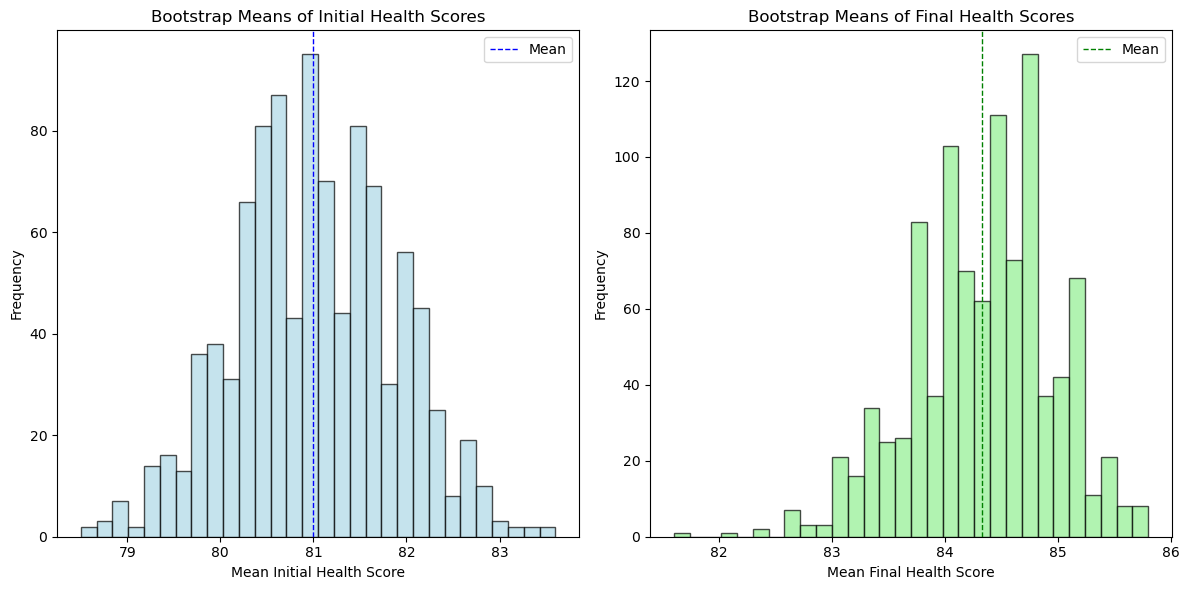

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating the data dictionary
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Storing the data in a DataFrame
df = pd.DataFrame(data)

# Number of bootstrap samples
n_bootstrap_samples = 1000
# Generate a random seed
np.random.seed(43)
# Function to perform bootstrapping
def bootstrap(data, n_samples):
    return np.random.choice(data, size=(n_samples, len(data)), replace=True)

# Bootstrapping the Initial and Final Health Scores
initial_bootstrap_samples = bootstrap(df['InitialHealthScore'].values, n_bootstrap_samples)
final_bootstrap_samples = bootstrap(df['FinalHealthScore'].values, n_bootstrap_samples)

# Calculating means of bootstrap samples
initial_means = initial_bootstrap_samples.mean(axis=1)
final_means = final_bootstrap_samples.mean(axis=1)

# Plotting histograms for bootstrap means
plt.figure(figsize=(12, 6))

# Histogram for Initial Health Score Means
plt.subplot(1, 2, 1)
plt.hist(initial_means, bins=30, color='lightblue', alpha=0.7, edgecolor='black')
plt.axvline(np.mean(initial_means), color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Bootstrap Means of Initial Health Scores')
plt.xlabel('Mean Initial Health Score')
plt.ylabel('Frequency')
plt.legend()

# Histogram for Final Health Score Means
plt.subplot(1, 2, 2)
plt.hist(final_means, bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.axvline(np.mean(final_means), color='green', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Bootstrap Means of Final Health Scores')
plt.xlabel('Mean Final Health Score')
plt.ylabel('Frequency')
plt.legend()

# Display the histograms
plt.tight_layout()
plt.show()


Analysis: Bootstrapping the data to a 1000 datasets increases the amount of samples and gives more of a normal distribution to the data. With such limited sample size, bootstrapping is needed to increase the credibility of the analysis and improve the accuracy of the sample statistic.

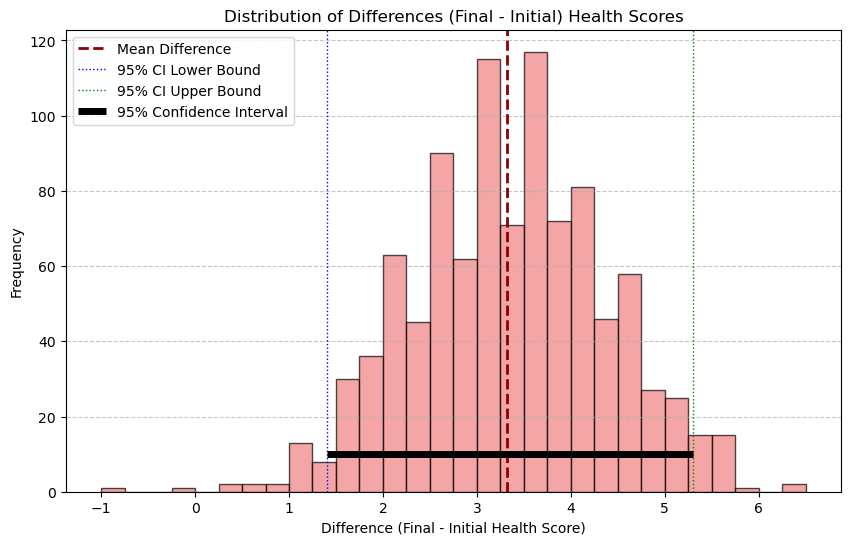

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creating the data dictionary
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Storing the data in a DataFrame
df = pd.DataFrame(data)

# Number of bootstrap samples
n_bootstrap_samples = 1000
# Generate a random seed
np.random.seed(43)
# Function to perform bootstrapping
def bootstrap(data, n_samples):
    return np.random.choice(data, size=(n_samples, len(data)), replace=True)

# Bootstrapping the Initial and Final Health Scores
initial_bootstrap_samples = bootstrap(df['InitialHealthScore'].values, n_bootstrap_samples)
final_bootstrap_samples = bootstrap(df['FinalHealthScore'].values, n_bootstrap_samples)

# Calculating means of bootstrap samples
initial_means = initial_bootstrap_samples.mean(axis=1)
final_means = final_bootstrap_samples.mean(axis=1)

# Calculating the difference between final and initial means
difference_means = final_means - initial_means

# Calculating the 95% confidence interval for the differences
difference_ci = np.percentile(difference_means, [2.5, 97.5])

# Plotting histogram for the differences
plt.figure(figsize=(10, 6))
plt.hist(difference_means, bins=30, color='lightcoral', alpha=0.7, edgecolor='black')

# Mean of differences
mean_difference = np.mean(difference_means)

# Adding a vertical line for the mean of differences
plt.axvline(mean_difference, color='darkred', linestyle='dashed', linewidth=2, label='Mean Difference')

# Adding lines for the confidence interval
plt.axvline(difference_ci[0], color='blue', linestyle='dotted', linewidth=1, label='95% CI Lower Bound')
plt.axvline(difference_ci[1], color='green', linestyle='dotted', linewidth=1, label='95% CI Upper Bound')

# Adding a horizontal bar for the confidence interval
plt.hlines(y=10, xmin=difference_ci[0], xmax=difference_ci[1], color='black', linewidth=5, label='95% Confidence Interval')

# Adding labels and title
plt.title('Distribution of Differences (Final - Initial) Health Scores')
plt.xlabel('Difference (Final - Initial Health Score)')
plt.ylabel('Frequency')
plt.legend()

# Display the histogram
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analysis: After subtracting the initial health score from the health score, we can see the general impact made by bootstrapping the data 1000 times. We can take the mean of the bootstrap samples, then subtract the initial from the final mean, then find out the confidence interval using the data, which shows that the 0 point is well outside of the confidence interval.
This rejects the null hypothesis that the vaccine is not affecting anything and helps us assume that the probability parameter of the average health score difference is most likely a positive influence.

Conclusion: The data analysis displays the impact of the vaccine rejects the null hypothesis, as after bootstrapping the data and extracting the confidence interval, we can accurately determine that the true value for the population parameter is not encompassing 0, which shows that there should be little to no chance that the vaccine is has no effect and that every observable change in health score is due to random generation. 
Further Considerations: Some things that can be considered are the fact that some people's health scores went down after the vaccine, which may show that certain people do not benefit or are even harmed by the vaccine, which may not reflect in the bootstrapped data as it is overlooked as an outlier.
Another thing to consider is the original sample size. The sample size is extremely small, at only 10 data points the data cannot be accurately determined. when bootstrapping off of a small data sample, the results could still be faulty and untruthful if the original dataset is unreliable.


Link to Conversation: https://chatgpt.com/share/66f9e05c-deb0-8010-a363-d38ab2e3d23b
Sure! Here’s a summary of our conversation:

Data Handling: We started with a dataset containing patient information, including their initial and final health scores.

Data Visualization:

You requested Python code to create bar graphs comparing initial and final health scores, separated by patient ID.
We created a histogram to show the mean differences between initial and final health scores and added confidence intervals to it.
You also asked for the standard error of the mean (SEM) to be included in the graphs.
Bootstrapping:

You asked about bootstrapping the dataset with 1000 datasets and calculating the confidence interval based on the bootstrapped data.
We generated a histogram of the differences between final and initial health scores, displayed the confidence interval, and also represented the SEM as an interval on the graph.
Statistical Analysis:

You inquired about the null hypothesis and requested a calculation of the sample statistics (mean, median, standard deviation, variance, minimum, and maximum) for both initial and final health scores.
Code Implementation:

Throughout the conversation, I provided Python code snippets to achieve various data visualizations and statistical analyses.
Let me know if you need any additional details or if there's anything else you'd like to explore!